# Olimpiyatlar Verisi Analiz Örneği

### Kütüphaneleri Yükleyelim

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
veri = pd.read_csv("Desktop/athlete_events.csv")
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### Sütün isimlerini değiştirme

In [5]:
veri.rename(columns = {
    "ID" : "id",
    "Name" : "isim",
    "Sex" : "cinsiyet",
    "Age" : "yas",
    "Height" : "boy",
    "Weight" : "kilo",
    "Team" : "takim",
    "NOC" : "uok",
    "Games" : "oyunlar",
    "Year" : "yil",
    "Season" : "sezon",
    "City" : "sehir",
    "Sport" : "spor",
    "Event" : "etkinlik",
    "Medal" : "madalya"}, inplace = True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


### İd ve oyunlar sütünlarını çıkardım çünkü fazla ve gereksiz bilgi

In [6]:
veri = veri.drop(["id", "oyunlar"], axis = 1)
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [7]:
veri.shape

(271116, 13)

### tekrar etmeyen etkinlikleri alıp birkaç tanesini yazdırdım

In [8]:
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [9]:
# etkinlikleri dolaşıp, boy ve ağırlık ortalamasını bulalım
# etkinlik özelinde kayıp boy ve kilo değrlerini etkinlik ortalamalarına eşitle
# bu bölüm çalışırken uzun sürüyor.

# gerçek veriyi bozmayalım.
veri_gecici = veri.copy()

boy_kilo_liste = ["boy", "kilo"]

for e in essiz_etkinlik: #liste içinde dolas
    #etkinlik filtresi
    etkinlik_filtre = veri_gecici.etkinlik == e
    #etkinliğe göre filtrele
    veri_filtreli = veri_gecici[etkinlik_filtre]

    #boy ve kilo etkinlik özelinde ortalamlar
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        # ~ değil anlamında
        if ~np.isnan(ortalama): #true #eğer etkinlik özelinde ortalama varsa
            veri_filtreli.loc[:, s] = veri_filtreli[s].fillna(ortalama)
        else: #eğer etkinlik özelinde ortalama yoksa, ortalamayı hesapla
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli.loc[:, s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
#aslında etkinliğe göre eksik boy ve kilo sıraladık çünkü etkinliklerde
#her branşın yani boyu ve kilosu farklı olabilir ama mesela boy olarak
#basketbol ve varsa eğer biniciliğin boyları aynı değildir o yüzden 
# !!!etkinliğe göre!!! boy ve kilo doldurması yapmak lazım
    
    #gecici veriyi gerçek veriyle eşitle
    veri_gecici[etkinlik_filtre] = veri_filtreli

# kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info() #boy ve kilo sütünlarında kayıp veri kaldı mı?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [10]:
#yas kolonunda tanımlı olmatyan değerleri doldurlarım
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yaş ortalamsı : {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş ortalamsı : 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Madalya almayanları çıkaralım

In [11]:
#madalya alamayanlar veya madalya sütünu nan olanlar
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [12]:
#madalyası tanımsız olmayanları aldık burada
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

### Sadece madalya kazananlar

In [13]:
veri = veri[madalya_degiskeni_filtresi]
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [14]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


### Temizlenmiş veriyi başka dosyaya aktaralım

In [15]:
#sonra kullanabilmek için veriyi kaydettim
veri.to_csv("C:/Users/timur/Desktop/olm_temiz.csv", index = False)

### Histogram yazacak fonk. yazalım

In [16]:
#öncelikli histogramlar çizelim
def plotHistogram(degisken):
    """
    Girdi : Değişken sütun ismi
    Çıktı : Değişken histogram
    """
    plt.figure() #kare şeklinde grafik oluşturmak istiyorsan her türlü figure yapman lazım
    plt.hist(veri[degisken], bins = 85, color = "orange")
    #histogram belli aralıklarda ne kadar verinin olduğunu gösterir
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

### Tüm sayısal değişkenler için histogramları çizelim

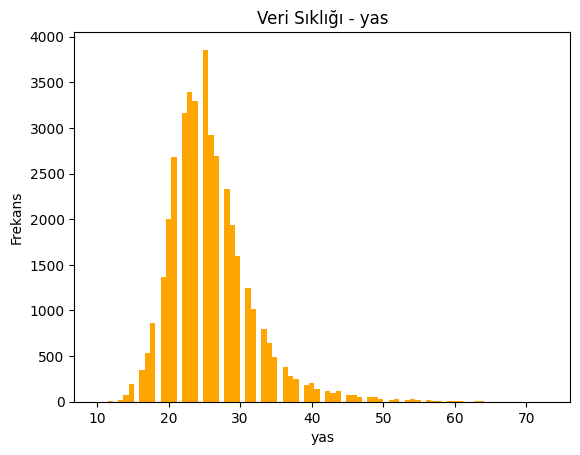

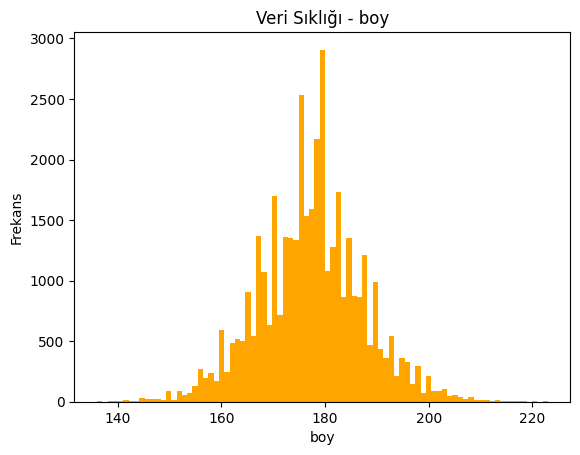

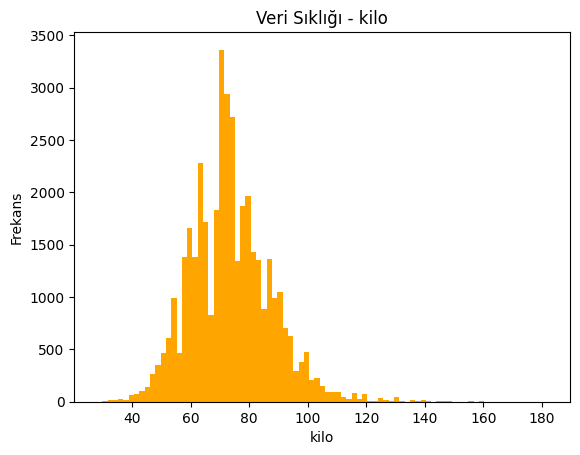

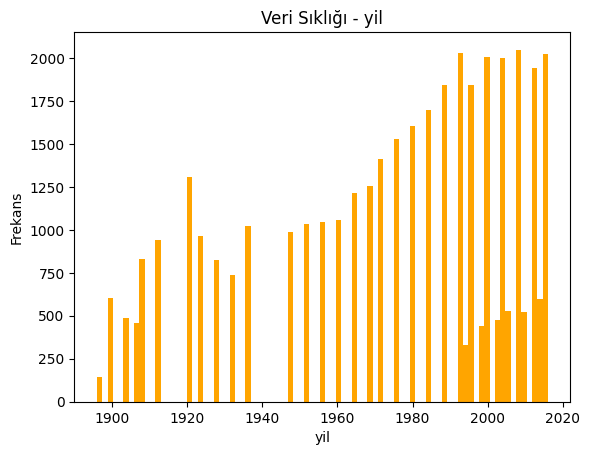

In [17]:
#tüm sayısal değişkenler için histogramları çizdim
sayisal_degiskenler = ["yas","boy","kilo","yil"]
for i in sayisal_degiskenler:
    plotHistogram(i)

### Verinin genel istatistikleri

In [18]:
#verinin genel istatitiksel özellikleri
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


### Yaş değişkeni için kutu grafiği çizdim

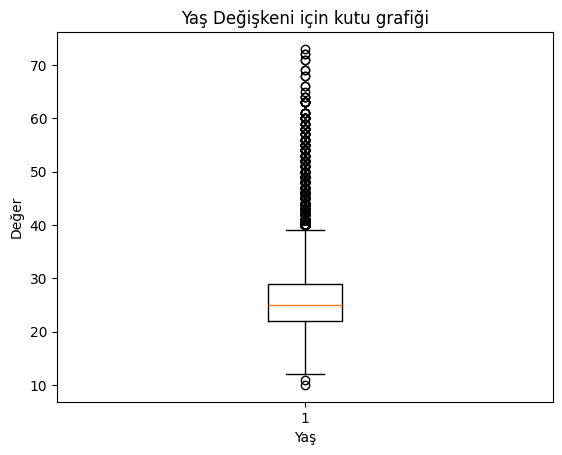

In [19]:
#yaş değişkeni için kutu grafiği
plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni için kutu grafiği")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.show()

### kategorik değişkenler için çabuk grafiği çizen fonk.

In [20]:
#kategorik değişkenler
#çubuk grafiği metodu
def plotBar(degisken, n=5):
    """
    Girdi : değişken/sütun adı
    n = gösterilecek eşsiz değer sayısı
    Çıktı: Çabuk Grafiği
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts() #value_counts fonksiyonu npye özel
    #eşsiz değişkenlerı bulan bir fonksiyondur bir nevi dict olarak düşünebilirsin
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "orange")
    plt.xticks(veri_sayma.index, veri_sayma.values)
    plt.xticks(rotation = 45)
    plt.ylabel = ("Frekans")
    plt.title("Veri sıklığı - {}".format(degisken))
    plt.show()
    print("{} : \n {}".format(degisken, veri_sayma))

### Çubuk garfiğinin çizilmesi

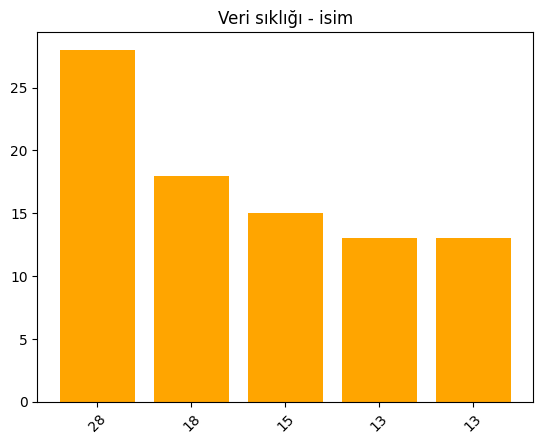

isim : 
 isim
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: count, dtype: int64


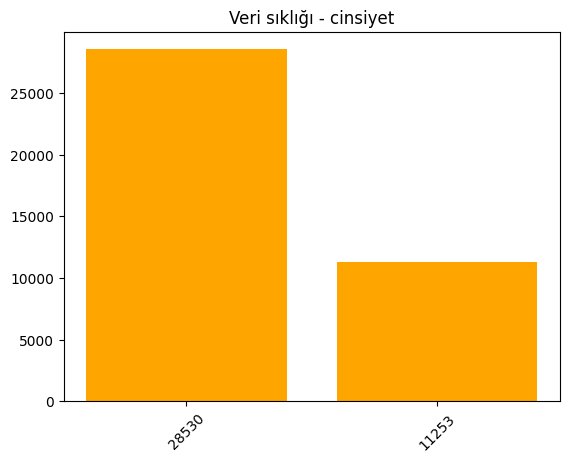

cinsiyet : 
 cinsiyet
M    28530
F    11253
Name: count, dtype: int64


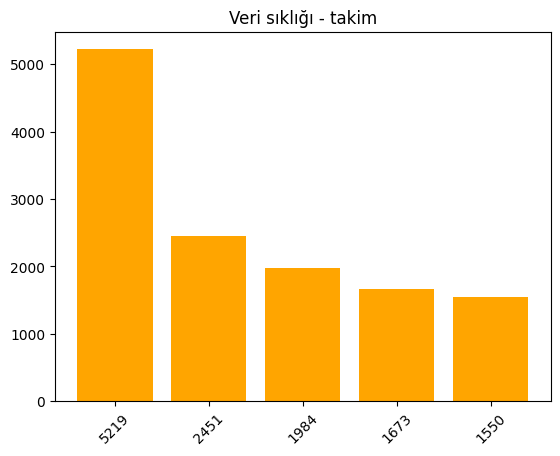

takim : 
 takim
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64


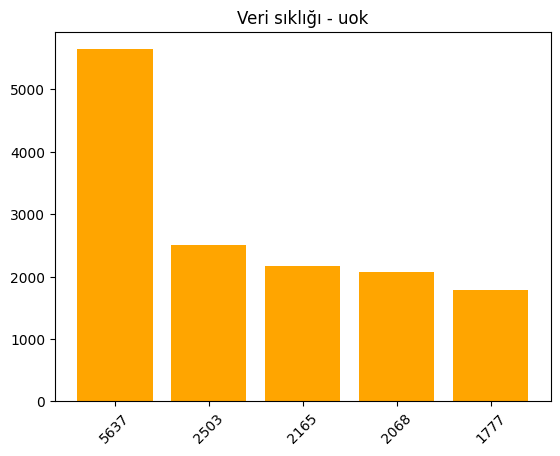

uok : 
 uok
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


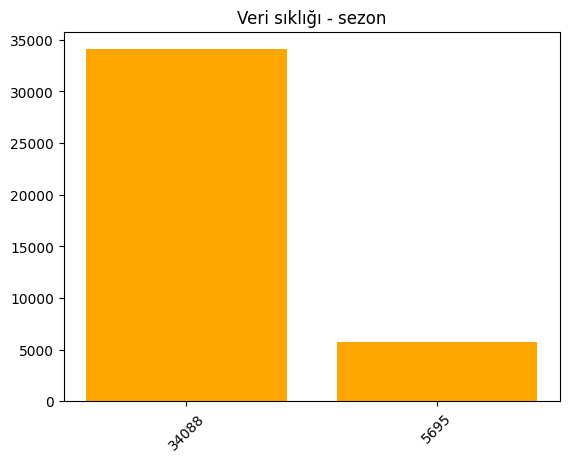

sezon : 
 sezon
Summer    34088
Winter     5695
Name: count, dtype: int64


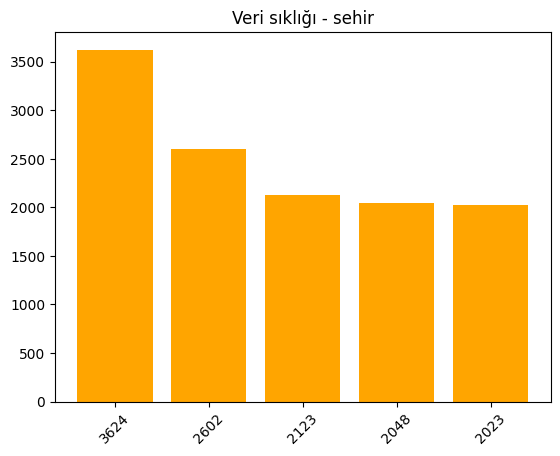

sehir : 
 sehir
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64


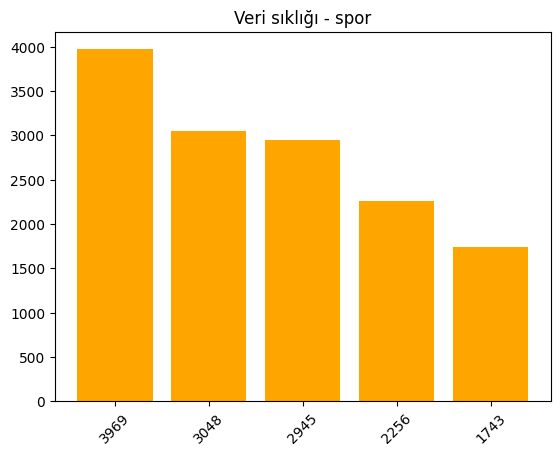

spor : 
 spor
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64


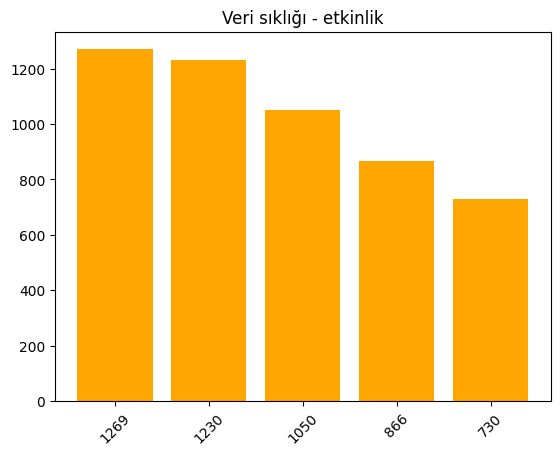

etkinlik : 
 etkinlik
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: count, dtype: int64


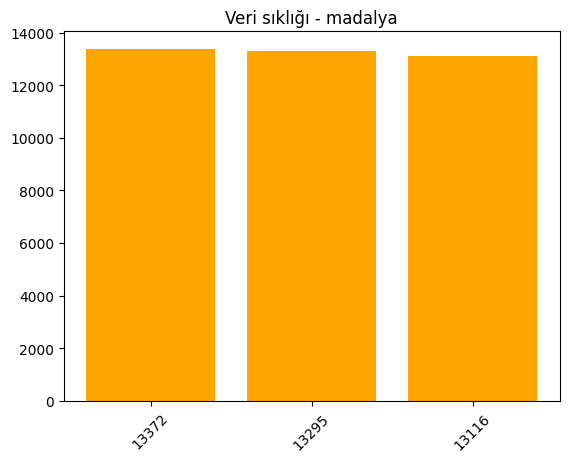

madalya : 
 madalya
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [21]:
kategorik_degisken = ["isim", "cinsiyet", "takim", "uok", "sezon", "sehir", "spor", "etkinlik", "madalya"]
for i in kategorik_degisken:
    plotBar(i)

### Cinsiyete Göre Boy ve Kilo Ağırlıklarının Karşılıştırılması

In [22]:
#cinsiyete göre Boy ve Kilo Ağrılıklarının karşılaştırılması
#erkek
erkek = veri[veri.cinsiyet == 'M']
erkek.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze


In [23]:
#Cinsiyete göre Boy ve Ağırlık karşılaştırması
#kadın
kadin = veri[veri.cinsiyet == 'F']
kadin.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze


### Boy ve Ağırlıklarının Karşılaştırma Grafiği

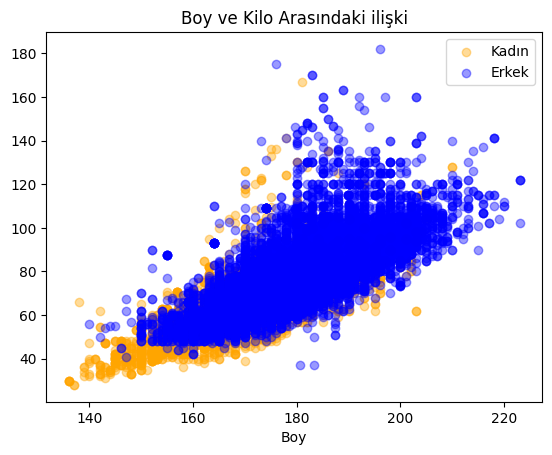

In [24]:
#Bot ve Ağırlık karşılaştırması grafiği
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.4, label = 'Kadın', color = "orange")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = 'Erkek', color = 'blue')
plt.xlabel("Boy")
plt.ylabel = ("Kilo")
plt.title("Boy ve Kilo Arasındaki ilişki")
plt.legend()
plt.show()

### Sayısal Sütünlar Arası Korelasyon

In [25]:
#Sayısal sütünlar arası ilişki
veri.loc[:,["yas", "boy", "kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


### Madalya Türüne Göre Yeni Sütunların Eklenmesi

In [26]:
#madalya yaş ilişkisi
#get_dummies() fonksiyonu, kategorik verileri sayısal (numeric) hale getirir.
#Yani One-Hot Encoding yapar.
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns = ["madalya"])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False


### Madalya Yaş Korelasyonu

In [27]:
#Madalaya Yaş İlişkisi
veri_gecici.loc[:,["yas", "madalya_Bronze", "madalya_Silver", "madalya_Gold"]].corr()

,yas,madalya_Bronze,madalya_Silver,madalya_Gold
yas,1.000000,-0.005584,0.008192,-0.002576
madalya_Bronze,-0.005584,1.000000,-0.496859,-0.504110
madalya_Silver,0.008192,-0.496859,1.000000,-0.499022
madalya_Gold,-0.002576,-0.504110,-0.499022,1.000000


### Takım Bazında Ayrıştırma

In [28]:
#takım bazında ayrıştırma
veri_gecici[["takim", "madalya_Bronze", "madalya_Silver", "madalya_Gold"]].groupby(["takim"],
    as_index = False).sum().sort_values(by = "madalya_Gold", ascending = False)[:10]
#ascending=False demek altın madalyadan başlar ve küçükten büyüğe doğru sıralar
#gerçek veriyi kopyaladığımız veri_gecici verisinin yukarıda belirtilen kolonları aldık
#onları -takım- denen gruba grupladık ve as_index kısmını yani satır değil bunu bir kolon olarak alınmasını
#istedik sonra bunları altın madalyaya göre sıralıyarak ilk 10nunu aldık

,takim,madalya_Bronze,madalya_Silver,madalya_Gold
462,United States,1233,1512,2474
403,Soviet Union,677,716,1058
165,Germany,678,627,679
215,Italy,484,508,535
171,Great Britain,572,582,519
149,France,577,518,455
420,Sweden,507,476,451
198,Hungary,365,330,432
67,Canada,408,413,422
117,East Germany,263,309,369


### Şehir Bazında Kazanılan Madalyalar

In [29]:
#Şehir bazında kazanılan madalyalar
veri_gecici[["sehir", "madalya_Bronze", "madalya_Silver", "madalya_Gold"]].groupby(["sehir"], 
    as_index = False).sum().sort_values(by = 'madalya_Gold', ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Silver,madalya_Gold
17,London,1214,1195,1215
3,Athina,860,859,883
18,Los Angeles,706,691,726
6,Beijing,710,667,671
27,Rio de Janeiro,703,655,665
38,Sydney,680,661,663
4,Atlanta,629,605,608
5,Barcelona,604,549,559
33,Seoul,549,513,520
2,Antwerpen,367,448,493


### Cinsiyete Göre Kazanılan Madalyalar

In [30]:
#Cinsiyete göre kazanılan madalyalar
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Silver","madalya_Gold"]].groupby(["cinsiyet"], 
    as_index = False).sum().sort_values(by = "madalya_Gold", ascending = False)[:10]

,cinsiyet,madalya_Bronze,madalya_Silver,madalya_Gold
1,M,9524,9381,9625
0,F,3771,3735,3747


### Pivot Tablo (Çok Değişkenli Veri Analizi)

In [31]:
#Çok değişkenli veri analizi
#pivot tablo
#pivot_table ve aggfunc pandasa ait fonksiyonlar
#pivot_table, veriyi özetlemek ve gruplamak için kullanılır.
#index	Satırları hangi kategoriye göre gruplayacağını belirtir.
#columns	Sütunları hangi kategoriye göre ayıracağını belirtir.
#values	Hesaplama yapılacak sayısal sütun(lar).
#aggfunc	Hangi özetleme işleminin yapılacağı (örneğin: mean, sum, min, max).

veri_pivot = veri.pivot_table(
    index = "madalya", 
    columns = "cinsiyet",
    values = ["boy", "kilo", "yas"],
    aggfunc = {
        "boy" : "mean", 
        "kilo" : "mean", 
        "yas": ["min", "max", "std"]})
veri_pivot.head()
#aggfunc, aggregate function (toplulaştırma fonksiyonu) kelimesinin kısaltmasıdır.
#pivot_table kullanırken, sayısal veriler üzerinde hangi özet işlemin yapılacağını belirtmek için kullanılır.pivot_table kullanırken, sayısal veriler üzerinde hangi özet işlemin yapılacağını belirtmek için kullanılır.
#np.std standart sapma fonksiyonudur. Standart sapma, verilerin ortalama etrafında nasıl dağıldığını gösteren bir ölçüdür.

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

### Anomali Tesbiti ve Aykırı Değerler İçin Bir Fonskiyon

In [32]:
#anomali tesbiti ve aykırı değer
def anomaliTespiti(df, ozellik):
    outlier_indeces = []

    for c in ozellik:
        # 1. çeyrek
        Q1 = np.percentile(df[c],25)
        # 3. çeyrek
        Q3 = np.percentile(df[c],75)
        #IQR hesabı (Inter Quartile Range)
        IQR = Q3 - Q1
        #Aykırı değer için ek adım 
        outlier_step = 1.5 * IQR
        
        #aykırı değer ve indeksi
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c]
        > Q3 + outlier_step)].index
        #tespit edilen indeksleri depola
        outlier_indeces.extend(outlier_list_col)#extend py'de birden çok eleman eklemeni sağlıyordu
        #append(ama çoklıu ekleme extend)
    #eşsiz aykırı değerler
    outlier_indeces = Counter(outlier_indeces)#Counter koleksiyon sayımı fonksiyonudur
    #kodumda aykırı değerleri listelicek!
    
    #eğer bir örnek V adet sütunda farklı değer ise
    #bunu aykırı değer kabul edelim.
    multiple_outliers = list(i for i, v in outlier_indeces.items() if v > 1)
    
    return multiple_outliers    

In [33]:
veri_anomali = veri.loc[anomaliTespiti(veri, ["yas", "kilo", "boy"])]
veri_anomali.spor.value_counts()#Bir sütundaki her değerin kaç kez geçtiğini sayar.

spor
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64

### Anomali Grafiği

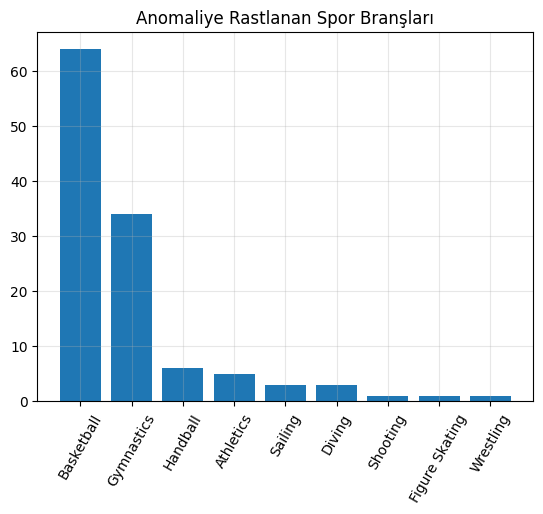

In [34]:
#  Anomali Grafiği
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 60)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel = ("Frekans")
plt.grid(True, alpha = 0.3)
plt.show()

In [35]:
#Jimnastik anomalileri
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [36]:
veri_gym.etkinlik.value_counts()

etkinlik
Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: count, dtype: int64

In [37]:
# Basketbol Anomalileri
veri_basketbol = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze


In [38]:
veri_basketbol.etkinlik.value_counts()

etkinlik
Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: count, dtype: int64

### Yıllara Göre Ortalama Yaş Boy Kilo Değişimleri

In [39]:
#zaman serilerinde veri analizi
#Yıllara göre ort. yaş, boy, kilo değişimi
veri_zaman =veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


### Olimpiyatların Gerçekleştiği Yıllar

In [40]:
# Olimpiyatların gerçekleştiği Yılları Bulalım
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [41]:
#Olimpiyatların sıralaması
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

### Olimpiyatların Gerçekleştiği Yılların Görseli

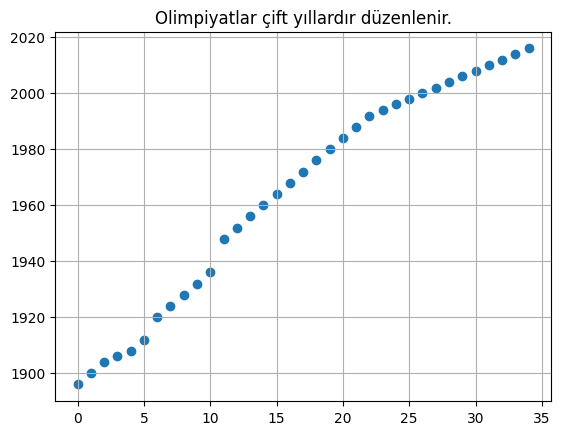

In [42]:
# Grafik
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel = "Yıllar"
plt.title("Olimpiyatlar çift yıllardır düzenlenir.")
plt.show()

In [43]:
#yılları date-time tipine dönüştürelim.
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yil"], format = '%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [44]:
#yeni sütün ekleyelim
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [45]:
# indeksi tarih_saat yapalım
veri_zaman = veri_zaman.set_index("tarih_saat")

# yil sütununu çıkaralım (inplace=True ile kalıcı olarak)
veri_zaman.drop(['yil'], axis=1, inplace=True)

veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [46]:
# Yıllara göre yaş boy ağrılık değişimleri
periyodik_veri = veri_zaman.select_dtypes(include = 'number').resample("2YE").mean() # 2 yıllık periyodik ortalama veri
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [47]:
#kayıp verileri çıkaralım. (silelim)
periyodik_veri.dropna(axis = 0, inplace = True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

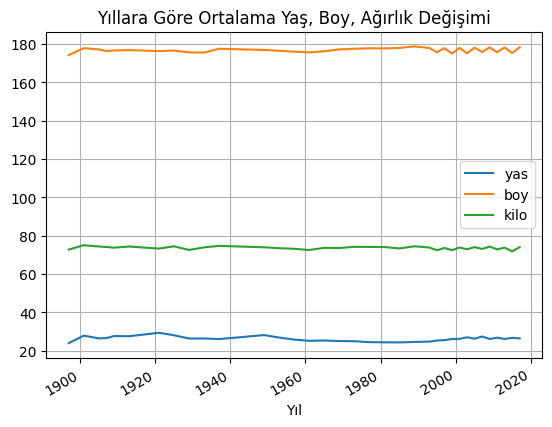

In [48]:
#grafik
plt.figure()
periyodik_veri.plot()
plt.title('Yıllara Göre Ortalama Yaş, Boy, Ağırlık Değişimi')
plt.xlabel('Yıl')
plt.grid(True)
plt.show()

In [49]:
#Yıllara göre Madalya Sayıları
veri_zaman = pd.get_dummies(veri_zaman, columns = ["madalya"], dtype = int)# kategorik verileri (one-hot encoding) formatına çevirir (0-1)
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [50]:
periyodik_veri = veri_zaman.select_dtypes(include='number').resample("2YE").sum()
periyodik_veri = periyodik_veri[(periyodik_veri != 0).all(axis=1)]
periyodik_veri.head()
# kayıp verileri çıkaralım
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis = 1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710,671,667
2010-12-31,13896.0,91395.00,37877.12,171,174,175
2012-12-31,50595.0,346091.47,143102.94,679,632,630
2014-12-31,15907.0,104686.00,42838.63,198,202,197
2016-12-31,53256.0,360846.03,149628.71,703,665,655


<Figure size 640x480 with 0 Axes>

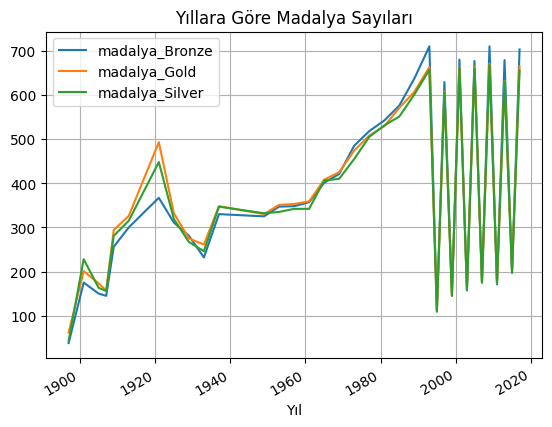

In [51]:
#görsel olarak görelim
plt.figure()
periyodik_veri.loc[:, ["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel = "Sayı"
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [52]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]

In [53]:
#yaz olimpiyatları
yaz.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [54]:
# kış olimpiyatları
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [55]:
# Periyodik veriler - kış
periyodik_veri_kis = kis.select_dtypes(include = 'number').resample("YE").sum()
periyodik_veri_kis = periyodik_veri_kis[(periyodik_veri_kis != 0).all(axis=1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [60]:
# Periyodik veriler yaz
periyodik_veriler_yaz = yaz.select_dtypes(include = 'number').resample("YE").sum()
periyodik_veriler_yaz = periyodik_veriler_yaz[(periyodik_veriler_yaz != 0).any(axis = 1)]
periyodik_veriler_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38,62,43
1900-12-31,16783.16,107440.91,45287.89,175,201,228
1904-12-31,12812.84,86139.17,36124.78,150,173,163
1906-12-31,12127.56,80767.19,33925.06,145,157,156
1908-12-31,22907.96,146806.47,61262.24,256,294,281


<Figure size 640x480 with 0 Axes>

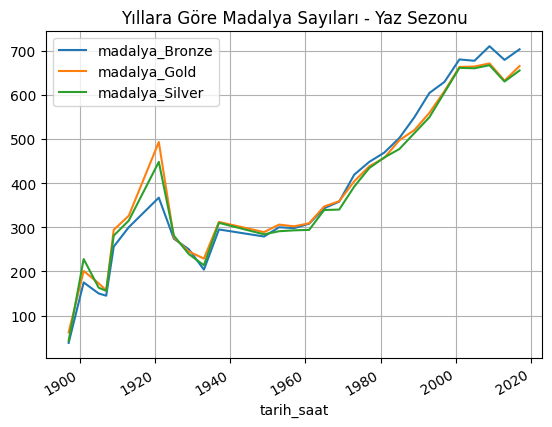

In [63]:
### Yeni Sezon Madalyaları - Görsel
plt.figure()
periyodik_veriler_yaz.loc[:, ["madalya_Bronze","madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.ylabel = "Sayı"
plt.xlabel = ("Yıl")
plt.grid(True)
plt.show()

### Kış Sezonu Madalyaları - Görsel

<Figure size 640x480 with 0 Axes>

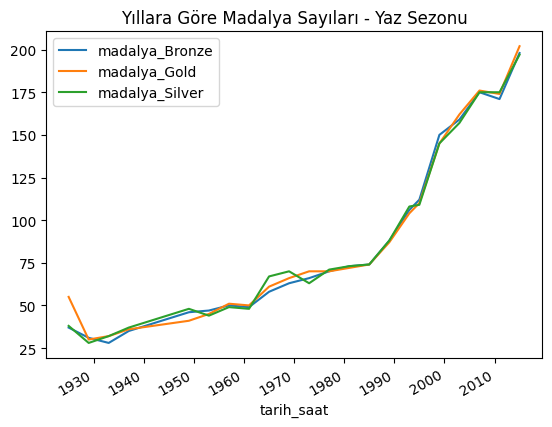

In [67]:
#Kış sezonu madalyaları
plt.figure()
periyodik_veri_kis.loc[:, ["madalya_Bronze","madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.ylabel = "Sayı"
plt.xlabel = "Yıl"
plt.show()